In [2]:
%matplotlib inline
import math
import random
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
    

from numpy import random
from scipy import stats as st

import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

import logging
# logging.basicConfig(format='%(process)d-%(levelname)s-%(message)s')
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)


In [3]:
import random

def constrained_sum_sample_pos(n, total):
    """Return a randomly chosen list of n positive integers summing to total.
    Each such list is equally likely to occur."""
    dividers = sorted(random.sample(range(1, total), n - 1))
    return [a - b for a, b in zip(dividers + [total], [0] + dividers)]

def time_part(timepartsize, nodeslistsize):
    time_partition = constrained_sum_sample_pos(timepartsize,nodeslistsize)
    return time_partition

# time_part_test = time_part(nodeslistsize=25, timepartsize = 15)
# time_part_test

In [99]:
import random
def create_input_file(num_nodes, desired_mean_edges, max_nodes, timepartsize, descr_string):
    
    txt_file_path = "ListSize" + str(max_nodes) \
    + "MeanEdges" \
    +  str(desired_mean_edges) + str(descr_string)
    
    # create simple list of nodes - numbers from 1 -> MaxNodes
    nodes_list = list(range(1,num_nodes))
    nodeslistsize = max_nodes
    random.seed(123)
    desired_mean_edges = desired_mean_edges #low noise #
    freq_edges = np.random.geometric(1/desired_mean_edges, size=nodeslistsize)
    logger.info("Edge frequencies: {}".format(freq_edges))
    logger.info("Stats Summary of freq_edges: {}".format(st.describe(freq_edges)))
    
    # create time partition
    time_part1 = time_part(timepartsize,nodeslistsize)
    logger.info("Time Partion created of length {}".format(len(time_part1)))
    logger.info("Time Partion List glimpse: {}".format(time_part1))

    # initialize empty dataframe
    df_freq_count = pd.DataFrame(columns = ["timestamp", "src", "dest", "weight", "label", "freq"])
    logger.info("Empty Dataframe initialized for output")

    # repeat out time_partition to get timestamp from index
    time_part1 = pd.Series(time_part1)
    time_part1 = time_part1.index.repeat(time_part1)
    logger.info("Time Partition Dataframe Head: {}".format)
    time_part1 = time_part1.tolist()
    
    # count of uniques
    freq_edges = pd.Series(freq_edges)
    

    # for each item in freq_edges:
    for index, val in freq_edges.items():

        # put two numbers from nodes list as src, dest
        temp_src, temp_dest = random.sample(nodes_list,2)

        # set time stamp from INDEX of freq_edges
        temp_time = time_part1[index]
    #     print("temp time: ", temp_time)
        
        # label = anomaly rule
        temp_label = 1 if val > (desired_mean_edges*2) else 0
        
    # add this stuff to df
        df_freq_count = df_freq_count.append({"timestamp":temp_time, 
                              "src": temp_src,
                              "dest": temp_dest,
                              "weight": 1,
                              "label": temp_label,
                              "freq": val}
                             , ignore_index=True )
    
    # save pic of freq_count with descr_string
    ax = plt.gca()
    current_fig = df_freq_count.groupby('timestamp').sum().plot(
    kind='line', 
    y='freq',
    ax=ax,
    legend=False)
    ax.set_xlabel('Timestamp', fontsize=18)
    ax.set_ylabel('Total Edge Frequency', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=18)
    fig = current_fig.get_figure()
    fig.savefig(txt_file_path+".png")
    logger.info("See image: ".format(txt_file_path))
    
    # repeat freq count rows out 
    df_freq_count['freq']=df_freq_count['freq'].astype(np.int64)
    df_input = df_freq_count.loc[df_freq_count.index.repeat(df_freq_count['freq'])]
    df_input=df_input.reset_index(drop=True)
    df_input = df_input[['timestamp','src', 'dest','weight', 'label']]

    df_input.to_csv(txt_file_path + ".csv", index = False, sep=",", header=False)
    logger.info("Done...CSV written to: {}".format(txt_file_path))
    return df_input, df_freq_count
    

INFO:root:Edge frequencies: [2 1 1 3 1 1 1 2 1 1 1 1 5 5 1 2 3 1 1 1 1 2 1 5 2]
INFO:root:Stats Summary of freq_edges: DescribeResult(nobs=25, minmax=(1, 5), mean=1.84, variance=1.8066666666666666, skewness=1.5570842210578095, kurtosis=1.1251923312591074)
INFO:root:Time Partion created of length 12
INFO:root:Time Partion List glimpse: [2, 1, 1, 2, 3, 2, 2, 1, 7, 2, 1, 1]
INFO:root:Empty Dataframe initialized for output
INFO:root:<built-in method format of str object at 0x000002061430A9D0>
INFO:root:See image: 
INFO:root:Done...CSV written to: ListSize25MeanEdges2LowNoiseLowAnom


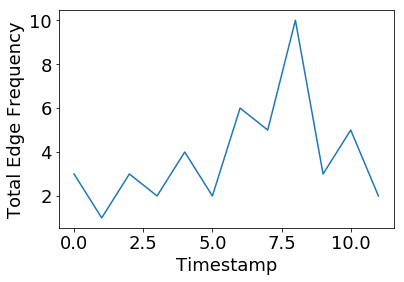

In [106]:
import random
#num nodes = combinations of nodes = num_nodesC2
df_test1 = create_input_file(num_nodes = 5, #10 combinations over 25
                             desired_mean_edges=2, 
                             max_nodes=25, 
                             timepartsize=12, 
                             descr_string="LowNoiseLowAnom")


INFO:root:Edge frequencies: [ 7  3  2  2  2  1  4  1  1  3  1  2  2  2  3  2  2  1  5  3  2  1  4  1
  1  4  2  2  1  4  1  1  1  1  1  1  3  2  4  6  1  2  1  3  2  4  6  1
  1  4  2  1  3  2  2  2  4  2  3  1  1  3  4  1  2  2  3  2  3  2  1  2
  4  1  1  1  3  1  2  3  2  1  1  2  2  2  1  3  3  6  1  2  1  1  2  1
  1  1  1  1  6  5  1  2  1  2  1  3  2  1  1  3  7  2  4  3  2  1  2  4
  4  5  2  2  8  1  1  5  1  1  4  4  4  3  1  1  1  1  5  1  1  2  1  1
  3  2  2  1  1  1  1  1  1  1  1  1  3  2  2  1  2  1  2  2  1  1  2  1
  1  2  1  2  1  1  1  1  2  1  1  1  4  3  3  1  4  1  3  1  2  1  1  2
  2  1  1  1  1  1  1  2  2  1  3  1  3  3  1  2  1  1  2  2  1  1  1  1
  4  1  1  8  4  1  1  1  1  1  1  4  1  1  2  1  1  1  1  1  4  3  1  2
  1  1  1  4  3  1  3  3  1  2  1  1  2  1  3  3  1  2  5  5  7  1  1  1
  1  1  3  1  1  6  1  2  1  1  1  1  1  1  2  2  1  2  4  3  4  1  1  1
  2  1  1  2  1  2  1  2  1  2  5  1  1  2  1  3  3  2  2  5  1  1  1  3
  2  2  2  4  2  1  7  

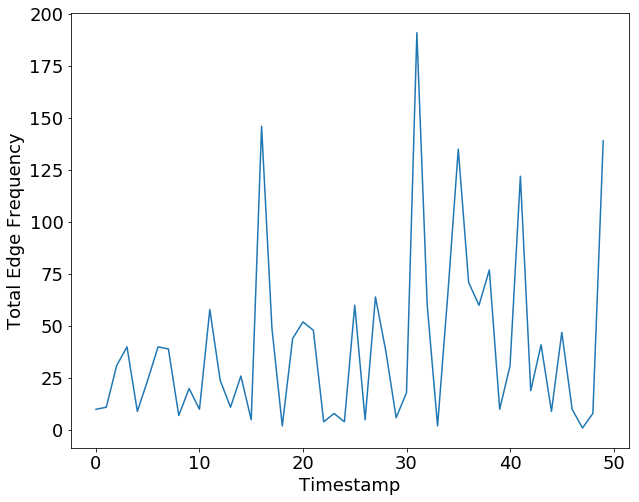

In [6]:
# high anomalies (low noise) = high mean edges = 5, 2,1000, 50
df_test2 = create_input_file(num_nodes = 5, #10 combinations over 25
                             desired_mean_edges=1, 
                             max_nodes=1000, 
                             timepartsize=50, 
                             descr_string="LowNoiseHighAnom")


In [5]:
#keep node combinations low for low noise

#ANOMALIES DEFINED AS 2(MeanEdges) Generated - FOR simplicity 
# eg. if 120 is max freq at timestamp, ONLY BURSTS of 60 or more will be anomaly

# manually keep same number of anomalies
# high noise = meanedges high, timepart+maxnodes size low, 5000, 1000, 999
# low noise = low mean edges, timepart+maxnodes size high 10, 100, 50


# low anomalies (low noise) = timepart size low: 2,1000, 50

# non-bursty (high noise) = 2000, 500, 499


# no new  = manually override nodes to same 2 (assume low noise) 2,1000, 50
# all new = manually change once generated (assume low noise) 2,1000, 50

# also for different timings (max nodes) at low noise - DO THIS LAST


In [6]:
def import_test_data(txt_file_path_str, sep_str):
    df = pd.read_csv(txt_file_path_str, 
    sep=sep_str, header=None, names=["timestamp", "src", "dest", "weight", "label"],
    index_col = False)
    df = df.drop(['weight'], axis=1)
    df = df.sort_values(by=["timestamp", "src", "dest"])
    df = df.groupby(["timestamp", "src", "dest"]).max()
    return df

In [7]:
def import_output_data(txt_file_path_str, sep_str):
    df = pd.read_csv(txt_file_path_str, sep=sep_str, 
        header=None, names=["timestamp", "src", "dest", "score"])
    df = df.sort_values(by=["timestamp", "src", "dest"])
    df = df.groupby(["timestamp", "src", "dest"]).max()
    return df

def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

In [8]:
# Here's the custom function returning classification report dataframe:
def metrics_report_to_df(ytrue, ypred, dataset_name):
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(ytrue, ypred)
    accuracy = metrics.accuracy_score(ytrue, ypred)
    classification_report = pd.concat(map(pd.DataFrame, [precision, 
    recall, 
    fscore, 
    support]), axis=1)
    classification_report.columns = ["precision", "recall", "f1-score", "support"] # Add row w "avg/total"
    classification_report.loc['avg/Total', :] = metrics.precision_recall_fscore_support(ytrue, 
    ypred, average='weighted')
    classification_report.loc['avg/Total', 'support'] = classification_report['support'].sum() 
    classification_report['Name']= dataset_name
    classification_report['accuracy'] = np.nan
    classification_report.loc['avg/Total', 'accuracy'] = accuracy 
    return(classification_report)

In [53]:
def process_accuracy_scores(test_file_path, output_file_path, threshold=0.8):
    # initialize dataframe for data output-> time,
    df_test = import_test_data(test_file_path, sep_str = ",")
    dataset_name = str(test_file_path)
    df_out = import_output_data(output_file_path, sep_str = ",")

    # check length of files
    if len(df_test) == len(df_out):
        print("Test_Output lengths match...keep going...")
    else:
        raise Exception("Y-Test vs Y-Pred length mismatch")

    # assume 'label' column indicates 1 = anomaly, 0 = not - CHECK this
    print("Checking label column exists & is binary...")
    if np.isin(df_test["label"].dropna().unique(),[0, 1]).all():
          print("Label format is binary - proceed...")
          y_true = df_test['label']
    else:
          raise Exception("Label format either doesn't exist or is not binary - please fix!")

    # create column for preds based on threshold
    y_pred = (df_out['score'] >= threshold)
    print(y_true, y_pred)
    
    # Provide input as true_label and predicted label (from process_accuracy_scores)
    classification_report = metrics_report_to_df(y_true, y_pred, dataset_name)
    
    # save confusion matrix in sep dataframe
    try:
        TP, FP, FN, TN = get_confusion_matrix_values(y_true, y_pred)
    except Exception:
            TP, FP, FN, TN = np.nan, np.nan, np.nan, np.nan
    
    # initialize df for confusion matrix
    cm_asdf = pd.DataFrame(data = {'TP': TP,
                                   'FP': FP,
                                   'FN': FN ,
                                   'TN': FN,
                                   'Dataset': dataset_name
                                  }, index=[0])
    
    # return both
    return cm_asdf, classification_report


### Case 1 - Low Noise, Low Anomalies

In [29]:
test_file_path1 = "1.ListSize25MeanEdges10LowNoiseLowAnom.csv"
output_file_path1 = "1.ListSize25MeanEdges10LowNoiseLowAnomOUTPUT.csv"
process_cm1, process_class1 = process_accuracy_scores(test_file_path1, output_file_path1, 0.4)

Test_Output lengths match...keep going...
Checking label column exists & is binary...
Label format is binary - proceed...
timestamp  src  dest
0          1    4       0
           2    4       0
1          3    4       0
2          2    1       0
3          1    2       0
                3       0
4          1    2       0
           4    1       0
5          1    4       0
           2    1       0
6          1    2       1
           4    3       0
7          4    2       0
8          3    1       1
                2       0
           4    1       0
                3       1
9          1    3       0
           4    2       0
10         2    3       0
11         1    2       0
Name: label, dtype: int64 timestamp  src  dest
0          1    4       False
           2    4       False
1          3    4       False
2          2    1       False
3          1    2       False
                3       False
4          1    2       False
           4    1       False
5          1    4       

c:\users\radhi\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
process_cm1

,Dataset,FN,FP,TN,TP
0,1.ListSize25MeanEdges10LowNoiseLowAnom.csv,3,0,3,18


In [31]:
process_class1

,precision,recall,f1-score,support,Name,accuracy
0,0.857143,1.000000,0.923077,18.0,1.ListSize25MeanEdges10LowNoiseLowAnom.csv,NaN
1,0.000000,0.000000,0.000000,3.0,1.ListSize25MeanEdges10LowNoiseLowAnom.csv,NaN
avg/Total,0.734694,0.857143,0.791209,21.0,1.ListSize25MeanEdges10LowNoiseLowAnom.csv,0.857143


scoring time: 0.001631  
sampling time: 2e-06  
updating time: 1.2e-05  
total time without IO: 0.001645  

## Case 2 - High Noise, High Anomalies

In [33]:
test_file_path2 = "2.ListSize1000MeanEdges2HighNoiseHighAnom.csv"
output_file_path2 = "2.ListSize1000MeanEdges2HighNoiseHighAnomOUTPUT.csv"

process_cm2, process_class2 = process_accuracy_scores(test_file_path2, output_file_path2, 0.4)

Test_Output lengths match...keep going...
Checking label column exists & is binary...
Label format is binary - proceed...
timestamp  src  dest
0          4    1       0
1          3    1       0
                2       0
           4    1       0
                3       0
2          1    2       0
                3       0
           2    3       0
           3    1       1
                2       0
           4    1       0
                3       0
3          1    2       0
                3       0
                4       0
           2    3       0
           3    2       0
                4       0
           4    1       0
                2       0
4          3    2       0
           4    1       0
5          1    3       1
           2    3       0
                4       0
           3    1       0
           4    3       0
6          1    2       0
                3       0
           2    3       0
                       ..
45         1    3       0
                4       0

In [34]:
process_cm2

,Dataset,FN,FP,TN,TP
0,2.ListSize1000MeanEdges2HighNoiseHighAnom.csv,47,15,47,287


In [35]:
process_class2

,precision,recall,f1-score,support,Name,accuracy
0,0.859281,0.950331,0.902516,302.0,2.ListSize1000MeanEdges2HighNoiseHighAnom.csv,NaN
1,0.500000,0.241935,0.326087,62.0,2.ListSize1000MeanEdges2HighNoiseHighAnom.csv,NaN
avg/Total,0.798085,0.829670,0.804333,364.0,2.ListSize1000MeanEdges2HighNoiseHighAnom.csv,0.82967


./SedanSpot --input ../example/2.ListSize1000MeanEdges2LowNoiseHighAnom.csv --sample-size 1 --num-walks 10 --restart-prob 0.5 >2.ListSize1000MeanEdges2LowNoiseHighAnomOUTPUT.csv                                                                                                             
scoring time: 0.11113  
sampling time: 2e-06  
updating time: 1.2e-05  
total time without IO: 0.111144  

## Case 3 - ONLY new (using low noise, low anomaly dataset with new edges every single time)

In [91]:
test_file_path3 = "3.ListSize25MeanEdges10AllNew.csv"
output_file_path3 = "3.ListSize25MeanEdges10AllNewOUTPUT.csv"

process_cm3, process_class3 = process_accuracy_scores(test_file_path3, output_file_path3, 0.4)

Test_Output lengths match...keep going...
Checking label column exists & is binary...
Label format is binary - proceed...
timestamp  src  dest
0          1    2       0
           2    3       0
1          3    4       0
2          4    5       0
3          5    6       0
4          6    7       0
           7    8       0
           8    9       0
5          9    10      0
           10   11      0
6          11   12      0
           12   13      0
7          12   13      0
8          12   13      0
           13   14      0
           14   15      0
           15   16      0
           16   17      0
9          17   18      0
           18   19      0
10         19   20      0
11         20   21      0
Name: label, dtype: int64 timestamp  src  dest
0          1    2       False
           2    3        True
1          3    4       False
2          4    5       False
3          5    6        True
4          6    7       False
           7    8        True
           8    9       Fals

c:\users\radhi\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [92]:
process_cm3 #TODO: need to do this manually

,Dataset,FN,FP,TN,TP
0,3.ListSize25MeanEdges10AllNew.csv,0,12,0,10


In [93]:
process_class3

,precision,recall,f1-score,support,Name,accuracy
0,1.0,0.454545,0.625,22.0,3.ListSize25MeanEdges10AllNew.csv,NaN
1,0.0,0.000000,0.000,0.0,3.ListSize25MeanEdges10AllNew.csv,NaN
avg/Total,1.0,0.454545,0.625,22.0,3.ListSize25MeanEdges10AllNew.csv,0.454545


scoring time: 0.001516
sampling time: 2e-06
updating time: 1e-05
total time without IO: 0.001528

## Case 4 - No new edges (using low noise, low anomaly dataset with same edges every timestamp)

scoring time: 1.5e-05
sampling time: 2e-06
updating time: 8e-06
total time without IO: 2.5e-05

In [39]:
test_file_path4 = "4.NoNew.csv"
output_file_path4 = "4.NoNewOUTPUT.csv"

process_cm4, process_class4 = process_accuracy_scores(test_file_path4, output_file_path4, 0.3)

Test_Output lengths match...keep going...
Checking label column exists & is binary...
Label format is binary - proceed...
timestamp  src  dest
0          1    2       0
1          1    2       0
2          1    2       0
3          1    2       0
4          1    2       0
5          1    2       0
6          1    2       0
7          1    2       0
8          1    2       1
9          1    2       0
10         1    2       0
11         1    2       0
12         1    2       0
13         1    2       0
14         1    2       0
15         1    2       0
16         1    2       0
17         1    2       0
18         1    2       0
19         1    2       0
20         1    2       1
21         1    2       0
22         1    2       0
23         1    2       0
Name: label, dtype: int64 timestamp  src  dest
0          1    2        True
1          1    2       False
2          1    2        True
3          1    2       False
4          1    2        True
5          1    2        True
6     

In [40]:
process_cm4

,Dataset,FN,FP,TN,TP
0,4.NoNew.csv,0,16,0,6


In [41]:
process_class4

,precision,recall,f1-score,support,Name,accuracy
0,1.000000,0.272727,0.428571,22.0,4.NoNew.csv,NaN
1,0.111111,1.000000,0.200000,2.0,4.NoNew.csv,NaN
avg/Total,0.925926,0.333333,0.409524,24.0,4.NoNew.csv,0.333333


scoring time: 0.000467
sampling time: 2e-06
updating time: 1.3e-05
total time without IO: 0.000482

In [42]:
test_file_path4b = "4b.NoNewComparison.csv"
output_file_path4b = "4b.NoNewComparisonOUTPUT.csv"

process_cm4b, process_class4b = process_accuracy_scores(test_file_path4b, output_file_path4b, 0.3)

Test_Output lengths match...keep going...
Checking label column exists & is binary...
Label format is binary - proceed...
timestamp  src  dest
0          1    2       0
1          1    2       0
2          1    2       0
3          1    2       0
4          1    2       0
5          1    2       0
6          1    2       0
7          1    2       0
8          1    2       1
9          1    2       0
10         1    2       0
11         1    2       0
Name: label, dtype: int64 timestamp  src  dest
0          1    2        True
1          1    2        True
2          1    2       False
3          1    2        True
4          1    2        True
5          1    2        True
6          1    2        True
7          1    2       False
8          1    2        True
9          1    2        True
10         1    2       False
11         1    2       False
Name: score, dtype: bool


In [43]:
process_cm4b

,Dataset,FN,FP,TN,TP
0,4b.NoNewComparison.csv,0,7,0,4


In [44]:
process_class4b

,precision,recall,f1-score,support,Name,accuracy
0,1.000000,0.363636,0.533333,11.0,4b.NoNewComparison.csv,NaN
1,0.125000,1.000000,0.222222,1.0,4b.NoNewComparison.csv,NaN
avg/Total,0.927083,0.416667,0.507407,12.0,4b.NoNewComparison.csv,0.416667


scoring time: 0.00029
sampling time: 2e-06
updating time: 5.4e-05
total time without IO: 0.000346

## Case 5 - System Time - generate large files (no accuracy tracking) 

In [63]:
# Meanedges kept at 2 to induce noise
df_test5f = create_input_file(num_nodes = 800, #same combinations
                             desired_mean_edges=2, 
                             max_nodes=100000, 
                             timepartsize=93999, 
                             descr_string="SizeTest100000")

INFO:root:Edge frequencies: [1 1 1 ... 1 1 1]
INFO:root:Stats Summary of freq_edges: DescribeResult(nobs=100000, minmax=(1, 17), mean=2.00539, variance=2.016081108711087, skewness=2.1286043565385664, kurtosis=6.518186998341447)
INFO:root:Time Partion created of length 93999
INFO:root:Time Partion List glimpse: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

INFO:root:Empty Dataframe initialized for output
INFO:root:<built-in method format of str object at 0x000001981F213978>
INFO:root:Done...CSV written to: ListSize100000MeanEdges2SizeTest100000


./SedanSpot --input ../example/5.ListSize2000MeanEdges2SizeTest2000.csv --sample-size 1 --num-walks 9 --restart-prob 0.5 >5.ListSize2000MeanEdges2SizeTest2000OUTPUT.csv  
scoring time: 0.01031  
sampling time: 2e-06  
updating time: 3.1e-05   
total time without IO: 0.010343  
  
  
./SedanSpot --input ../example/5b.ListSize4000MeanEdges2SizeTest4000.csv --sample-size 1 --num-walks 9 --restart-prob 0.5 >5b.ListSize4000MeanEdges2SizeTest4000OUTPUT.csv  
scoring time: 0.021096  
sampling time: 1.7e-05  
updating time: 2.5e-05  
total time without IO: 0.021138  
  
  
./SedanSpot --input ../example/5c.ListSize8000MeanEdges2SizeTest8000.csv --sample-size 1 --num-walks 150 --restart-prob 0.5 >5b.ListSize8000MeanEdges2SizeTest8000OUTPUT.csv
scoring time: 0.645246
sampling time: 4.5e-05
updating time: 4.6e-05
total time without IO: 0.645337

./SedanSpot --input ../example/5d.ListSize12000MeanEdges2SizeTest12000.csv --sample-size 1 --num-walks 150 --restart-prob 0.5 >5d.ListSize12000MeanEdges2SizeTest12000OUTPUT.csv
scoring time: 0.969722
sampling time: 4.4e-05
updating time: 3.8e-05
total time without IO: 0.969804

./SedanSpot --input ../example/5e.ListSize25000MeanEdges2SizeTest25000.csv --sample-size 1 --num-walks 800 --restart-prob 0.5 >5e.ListSize25000MeanEdges2SizeTest25000OUTPUT.csv
scoring time: 10.567
sampling time: 0.000149
updating time: 0.000118
total time without IO: 10.5672

./SedanSpot --input ../example/5f.ListSize50000MeanEdges2SizeTest50000.csv --sample-size 1 --num-walks 800 --restart-prob 0.5 >5f.ListSize50000MeanEdges2SizeTest50000OUTPUT.csv
scoring time: 21.3417
sampling time: 0.000199
updating time: 0.000102
total time without IO: 21.342

./SedanSpot --input ../example/5g.ListSize100000MeanEdges2SizeTest100000.csv --sample-size 1 --num-walks 800 --restart-prob 0.5 >5g.ListSize100000MeanEdges2SizeTest100000OUTPUT.csv
scoring time: 42.9129
sampling time: 0.000342
updating time: 0.000298
total time without IO: 42.9135



# Case 6 - New with high noise, low anomly (subset)

In [94]:
test_file_path6 = "6.HighNoiseHighAnomNewOnly.csv"
output_file_path6 = "6.HighNoiseHighAnomNewOnlyOUTPUT.csv"

process_cm6, process_class6 = process_accuracy_scores(test_file_path6, output_file_path6, 0.4)

Test_Output lengths match...keep going...
Checking label column exists & is binary...
Label format is binary - proceed...
timestamp  src  dest
0          4    1       0
1          3    1       0
                2       0
           4    1       0
                3       0
2          1    2       0
                3       0
           2    3       0
           3    1       1
                2       0
           4    1       0
                3       0
3          1    2       0
                3       0
                4       0
           2    3       0
           3    2       0
                4       0
           4    1       0
                2       0
4          3    2       0
           4    1       0
5          1    3       1
           2    3       0
                4       0
           3    1       0
           4    3       0
6          1    2       0
                3       0
           2    3       0
                       ..
45         1    3       0
                4       0

In [95]:
process_cm6

,Dataset,FN,FP,TN,TP
0,6.HighNoiseHighAnomNewOnly.csv,57,4,57,300


In [96]:
process_class6

,precision,recall,f1-score,support,Name,accuracy
0,0.840336,0.986842,0.907716,304.0,6.HighNoiseHighAnomNewOnly.csv,NaN
1,0.428571,0.050000,0.089552,60.0,6.HighNoiseHighAnomNewOnly.csv,NaN
avg/Total,0.772463,0.832418,0.772853,364.0,6.HighNoiseHighAnomNewOnly.csv,0.832418


## Enron Dataset

In [123]:
# find edge frequency

from datetime import datetime
enron_raw = pd.read_csv("enronsorted_raw.txt", sep=" ", header=None, 
        names=["src", "dest", "label" , "timestamp"])
enron_raw = enron_raw.sort_values(by=["timestamp", "src", "dest"], kind = "mergesort")
enron_raw = enron_raw.groupby(["timestamp"]).sum()

In [124]:
np.mean(enron_raw['label'])

5.209889092592256

In [74]:
# Enron timestamps are UNIX epoch - note that this is already supplied

from datetime import datetime
enron_out = pd.read_csv("enron.txt", sep=",", header=None, 
        names=["timestamp", "score"])
enron_out['timestamp'] = enron_out['timestamp'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
enron_out = enron_out.sort_values(by="timestamp", kind = "mergesort")
#enron_out = enron_out.groupby(["timestamp"]).count()


In [75]:
enron_out = enron_out.groupby(["timestamp"]).max()
enron_out.to_csv("enron_out.csv", sep = ",")

In [76]:
enron_out[enron_out['score']>=0.76]

,score
timestamp,
1999-11-08,0.836066
1999-12-02,0.823322
1999-12-11,0.871134
1999-12-17,0.814126
1999-12-28,0.848943
2000-01-13,0.837134
2000-01-17,0.821429
2000-01-18,0.812030
2000-01-25,0.852941


In [77]:
enron_out

,score
timestamp,
1980-01-01,0.000000
1986-04-26,0.000000
1986-05-01,0.000000
1997-01-01,0.000000
1998-01-04,0.000000
1998-01-06,0.000000
1998-05-27,0.000000
1998-09-01,0.000000
1998-10-30,0.000000


In [78]:
enron_out.describe()

,score
count,1240.000000
mean,0.451822
std,0.385209
min,0.000000
25%,0.126697
50%,0.205330
75%,0.865591
max,0.906890


In [79]:
from datetime import datetime
enron_test = pd.read_csv("enron_test.csv", sep=",", header=None, 
        names=["timestamp", "label"])
enron_test['timestamp'] = enron_test['timestamp'].apply(lambda x: datetime.strptime(x, "%d/%m/%Y"))
enron_test = enron_test.sort_values(by="timestamp", kind = "mergesort")
enron_test = enron_test.groupby(["timestamp"]).max()
enron_test.describe()

,label
count,1240.000000
mean,0.008065
std,0.089476
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [82]:
def process_enron(enron_test, enron_out, threshold=0.8):
    # initialize dataframe for data output-> time,
    df_test = enron_test
    dataset_name = "Enron"
    df_out = enron_out

    # check length of files
    if len(df_test) == len(df_out):
        print("Test_Output lengths match...keep going...")
    else:
        raise Exception("Y-Test vs Y-Pred length mismatch")

    # assume 'label' column indicates 1 = anomaly, 0 = not - CHECK this
    print("Checking label column exists & is binary...")
    if np.isin(df_test["label"].dropna().unique(),[0, 1]).all():
          print("Label format is binary - proceed...")
          y_true = df_test['label']
    else:
          raise Exception("Label format either doesn't exist or is not binary - please fix!")

    # create column for preds based on threshold
    y_pred = (df_out['score'] >= threshold)
    print(y_true, y_pred)
    
    # Provide input as true_label and predicted label (from process_accuracy_scores)
    classification_report = metrics_report_to_df(y_true, y_pred, dataset_name)
    
    # save confusion matrix in sep dataframe
    TP, FP, FN, TN = get_confusion_matrix_values(y_true, y_pred)
    
    # initialize df for confusion matrix
    cm_asdf = pd.DataFrame(data = {'TP': TP,
                                   'FP': FP,
                                   'FN': FN ,
                                   'TN': FN,
                                   'Dataset': dataset_name
                                  }, index=[0])
    
    # return both
    return cm_asdf, classification_report

In [83]:
enron_cm, enron_class1 = process_enron(enron_test, enron_out, 0.76)

Test_Output lengths match...keep going...
Checking label column exists & is binary...
Label format is binary - proceed...
timestamp
1980-01-01    0
1986-04-26    0
1986-05-01    0
1997-01-01    0
1998-01-04    0
1998-01-06    0
1998-05-27    0
1998-09-01    0
1998-10-30    0
1998-11-02    0
1998-11-03    0
1998-11-04    0
1998-11-05    0
1998-11-13    0
1998-11-19    0
1998-11-20    0
1998-11-24    0
1998-11-25    0
1998-11-30    0
1998-12-01    0
1998-12-02    0
1998-12-03    0
1998-12-04    0
1998-12-05    0
1998-12-08    0
1998-12-09    0
1998-12-10    0
1998-12-11    0
1998-12-14    0
1998-12-15    0
             ..
2002-06-22    0
2002-06-24    0
2002-06-25    0
2002-06-26    0
2002-06-27    0
2002-06-28    0
2002-07-01    0
2002-07-02    0
2002-07-03    0
2002-07-04    0
2002-07-05    0
2002-07-08    0
2002-07-09    0
2002-07-10    0
2002-07-11    0
2002-07-12    0
2002-08-31    1
2002-10-09    0
2002-10-31    0
2002-12-21    0
2003-01-05    1
2003-01-14    0
2004-02-03    0
2004

In [84]:
enron_class1

,precision,recall,f1-score,support,Name,accuracy
0,0.989630,0.543089,0.701312,1230.0,Enron,NaN
1,0.005310,0.300000,0.010435,10.0,Enron,NaN
avg/Total,0.981692,0.541129,0.695741,1240.0,Enron,0.541129


In [85]:
enron_cm

,Dataset,FN,FP,TN,TP
0,Enron,7,562,7,668
